Аналітичний розв'язок: y = 10*x


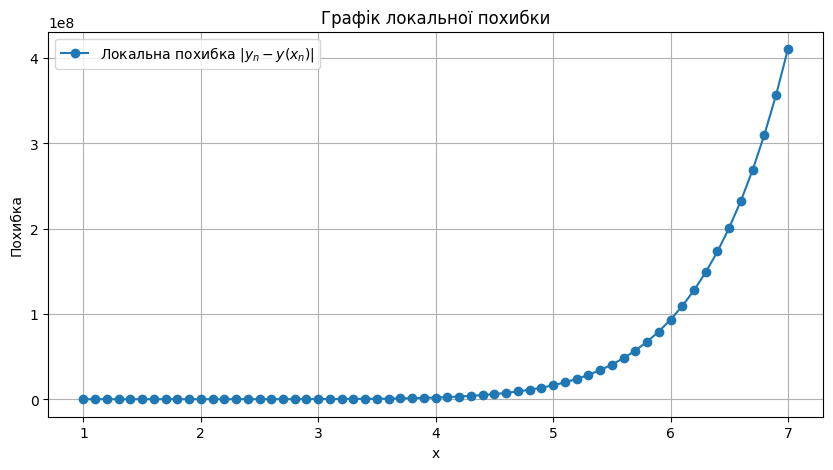

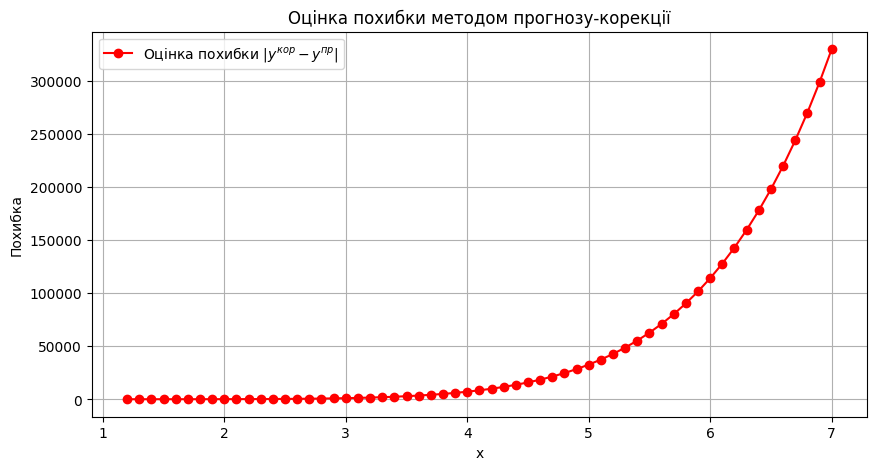

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

a, b = 1, 7
y0 = 10  
h = 0.1
x_values = np.arange(a, b + h, h)



def f(x, y):
    return 10 * y**(9/10)



def y_exact(x):
    return 10 * x 


x_sym = sp.symbols('x')
solution = 10 * x_sym
print(f"Аналітичний розв'язок: y = {solution}")

y = [y0]
n = len(x_values)
x1 = a + h
k1 = f(a, y0)
k2 = f(a + h/2.0, y0 + h*k1/2.0)
k3 = f(a + h/2.0, y0 + h*k2/2.0)
k4 = f(a + h, y0 + h*k3)
y1 = y0 + h * (k1 + 2*k2 + 2*k3 + k4) / 6.0
y.append(y1)

for i in range(1, n - 1):

    y_pred = y[i] + h * (3 * f(x_values[i], y[i]) -
                         f(x_values[i - 1], y[i - 1])) / 2

    y_corr = y[i] + h * (f(x_values[i + 1], y_pred) + f(x_values[i], y[i])) / 2
    y.append(y_corr)

y_true = y_exact(x_values)
phi = np.abs(np.array(y) - y_true)

plt.figure(figsize=(10, 5))
plt.plot(x_values, phi, label='Локальна похибка $|y_n - y(x_n)|$', marker='o')
plt.title('Графік локальної похибки')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.grid(True)
plt.legend()
plt.show()


y_pred_list = [y1]
for i in range(1, n - 1):
    y_pred = y[i] + h * (3 * f(x_values[i], y[i]) -
                         f(x_values[i - 1], y[i - 1])) / 2
    y_pred_list.append(y_pred)

estimate_error = np.abs(np.array(y[2:]) - np.array(y_pred_list[1:]))

plt.figure(figsize=(10, 5))
plt.plot(x_values[2:], estimate_error,
         label='Оцінка похибки $|y^{кор} - y^{пр}|$', marker='o', color='red')
plt.title('Оцінка похибки методом прогнозу-корекції')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.grid(True)
plt.legend()
plt.show()

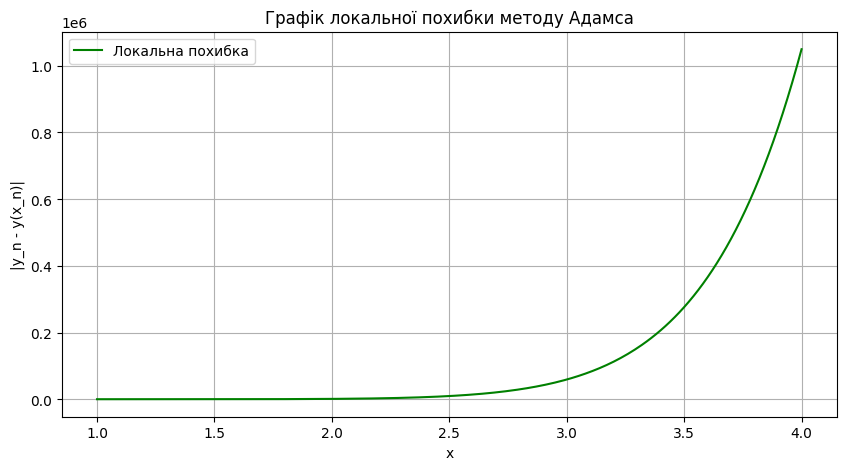

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(x_vals, errors, label='Локальна похибка', color='green')
plt.xlabel('x')
plt.ylabel('|y_n - y(x_n)|')
plt.title('Графік локальної похибки методу Адамса')
plt.grid(True)
plt.legend()
plt.show()

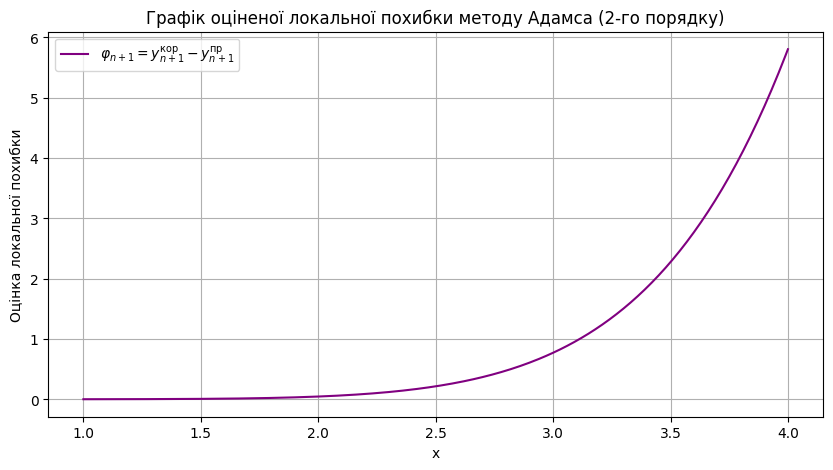

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(x_vals, pc_errors, label=r'$\varphi_{n+1} = y^{\text{кор}}_{n+1} - y^{\text{пр}}_{n+1}$', color='purple')
plt.xlabel('x')
plt.ylabel('Оцінка локальної похибки')
plt.title('Графік оціненої локальної похибки методу Адамса (2-го порядку)')
plt.grid(True)
plt.legend()
plt.show()